# Plots y visualización de los datos

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np #Operaciones matemáticas complejas

In [55]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")
data.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [56]:
# Justo antes de hacer el plot, quede automáticamente dentro de la misma celda
%matplotlib inline

In [57]:
#Guardar plot en el directorio local 
#savefig("path.jpeg")

## Scatter Plot

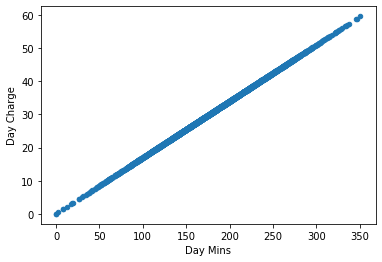

In [58]:
# Relación variables "Day Mins" y "Day Charge"
# Hipótesis: Cuanta más batería tiene el dispositivo móvil, más minutos se usa.
data.plot(kind="scatter", x="Day Mins", y="Day Charge")

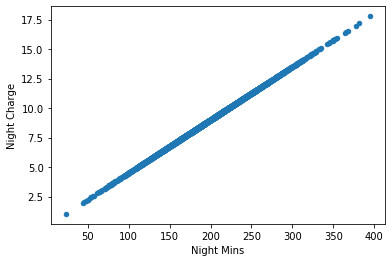

In [59]:
# Relación variables "Night Mins" y "Night Charge"
# Hipótesis: Mismo escenario, pero llamadas de noche.
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

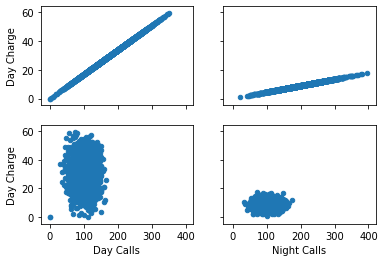

In [60]:
# Gráficos en diferentes regiones
# Se crean dos variables: 'figure' ahcer el dibujo y 'axs para hacer los ejes. 
# Van a quedar asignadas por el paquete plt, y se llama a la función subplots
# Hipótesis: De noche se llama más que de día
figure, axs = plt.subplots(2,2,sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

## Histógramas de frecuencias

Nos permiten entender si los datos se están comportando de manera normal (Campana de Gauss) o si no se comportan así. La cantida de divisiones del histograma (bins) se basa en la regla de Sturges: "es un método empírico muy utilizado en la estadística descriptiva para determinar el número de clases que deben existir en un histograma de frecuencias, para así poder clasificar un conjunto de datos que representan una muestra o población".

Sturges establece que el número óptimo de intervalos k es dado por la expresión: k = 1 + log2(N), donde N = Muestra.

Text(0.5, 1.0, 'Histograma de número de llamadas al día')

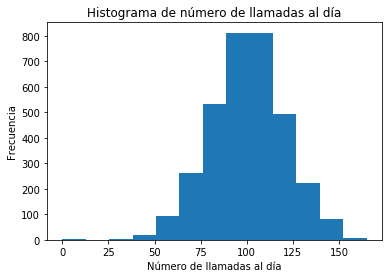

In [61]:
# La cantidad de intervalos debe ser un número entero, por lo que se debe truncar el resultado de la variable, 
# redondeando hacia arriba (.ceil) y luego convirtiendo ese valor con decimal cero (ej.: 10.0) a un entero sin decimal (10)
k = int(np.ceil(1+np.log2(3333)))

plt.hist(data["Day Calls"], bins = k) # bins = # de divisiones del histograma

plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de número de llamadas al día")

## Boxplot, diagrama de caja y bigotes

Text(0, 0.5, 'Número de llamadas diarias')

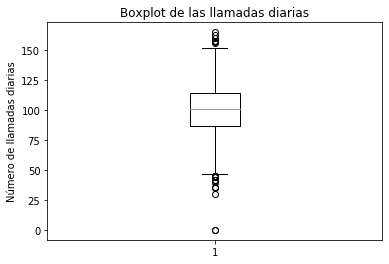

In [62]:
plt.boxplot(data["Day Calls"])
plt.title("Boxplot de las llamadas diarias")
plt.ylabel("Número de llamadas diarias")

In [63]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [64]:
# Rango intercuartílico - IQR = Cuartil 75% - Cuartil 25% (Tamaño de la caja)
IQR = data["Day Calls"].quantile(0.75) - data["Day Calls"].quantile(0.25)
IQR

27.0

In [65]:
# Bigote superior
data["Day Calls"].quantile(0.25) - 1.5 * IQR

46.5

In [66]:
# Bigote inferior
data["Day Calls"].quantile(0.75) + 1.5 * IQR

154.5

Todos aquellos valores que estén por encima del bigote inferior (46.5) o que esté por debajo del bigote superior (154.5) son "datos atípicos (outliers).